# Classificació de l'idioma d'una paraula
Autors:
- Jonathan Salisbury Vega
- Julià Wallis Medina

Aquesta pràctica consisteix en la classificació de l'idioma d'una paraula emprant SVMs. Per a això, s'ha creat un dataset de paraules en diferents idiomes, i s'han extret diferentes característiques de les paraules. Després s'ha entrenat un model de classificació per tal de poder classificar les paraules en els seus idiomes corresponents.

In [44]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read Preprocessed Data

In [45]:
df = pd.read_csv('data/comb/ACD.csv', index_col=0)
df.head()

,word,lang,len,vow,acc,accl,accr,die,cir,ñ,...,en_zipf,es_zipf,ca_zipf,it_zipf,fr_zipf,pt_zipf,de_zipf,sv_zipf,pl_zipf,ru_zipf
0,as,1,2,1,0,0,0,0,0,0,...,6.77,4.66,4.22,4.26,5.79,6.73,4.57,4.66,4.51,3.89
1,his,1,3,1,0,0,0,0,0,0,...,6.51,3.63,3.12,3.67,3.70,3.94,3.93,3.89,3.82,3.62
2,that,1,4,1,0,0,0,0,0,0,...,7.01,4.12,3.67,4.24,4.12,4.38,4.56,4.50,4.40,3.98
3,he,1,2,1,0,0,0,0,0,0,...,6.69,5.77,5.87,4.00,4.02,4.01,4.36,4.32,4.39,3.74
4,was,1,3,1,0,0,0,0,0,0,...,6.82,3.84,3.78,3.94,3.83,3.99,6.49,4.01,5.57,3.76


In [46]:
# Check feature correlations with language
df.corr(numeric_only=True).round(2)['lang'].sort_values(ascending=False)

lang         1.00
rus          0.37
sue          0.22
suf_rus      0.19
pre_rus      0.16
die          0.12
ger          0.11
pol          0.09
suf_pol      0.06
len          0.06
num_words    0.06
por          0.06
ru_zipf      0.06
hyph         0.04
rares        0.04
ç            0.03
sv_zipf      0.01
cir          0.01
suf_ita      0.01
apos        -0.00
pre_sue     -0.01
ñ           -0.02
accr        -0.02
suf_por     -0.03
ita         -0.04
acc         -0.04
accl        -0.05
suf_fra     -0.05
pre_ita     -0.05
pre_esp     -0.05
esp         -0.05
pre_cat     -0.05
pre_por     -0.06
fra         -0.06
cat         -0.06
pre_eng     -0.06
ale         -0.06
pre_fra     -0.06
pre_pol     -0.06
suf_esp     -0.08
suf_cat     -0.10
suf_eng     -0.10
pre_ale     -0.12
suf_sue     -0.13
suf_ale     -0.15
pl_zipf     -0.16
pt_zipf     -0.17
vow         -0.24
it_zipf     -0.25
es_zipf     -0.32
fr_zipf     -0.34
ca_zipf     -0.38
en_zipf     -0.41
de_zipf     -0.55
Name: lang, dtype: float64

### Data preparation for models

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [48]:
# Separate features from target
X = df.drop(['word', 'lang'], axis=1)
y = df['lang']

In [49]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=43)

In [50]:
# Scale Data: https://towardsdatascience.com/feature-scaling-and-normalisation-in-a-nutshell-5319af86f89b
scaler = StandardScaler() # try different scalers
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_val = scaler.transform(X_val)

In [51]:
# Dimensionality Reduction: https://www.mikulskibartosz.name/pca-how-to-choose-the-number-of-components/
pca = PCA(n_components=0.99, random_state=43) # try different n_components
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
X_val_pca = pca.transform(X_val)
pca.n_components_

44

### Models

In [52]:
from sklearn import svm

In [53]:
# Create common Models with different Kernels
models = {
    'Linear': svm.SVC(kernel='linear', probability=True),  # linear kernel
    'Polynomial': svm.SVC(kernel='poly', probability=True),  # polynomial kernel with degree 3
    'Radial': svm.SVC(kernel='rbf', probability=True),  # RBF kernel with gamma = 0.1
    'Sigmoid': svm.SVC(kernel='sigmoid', probability=True)
}

# Train models
for key in models:
    models[key].fit(X_train_pca, y_train)

### Metrics

In [54]:
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Accuracy

In [55]:
for key in models:
    score = models[key].score(X_test_pca, y_test)
    print(f'{key} accuracy: {round(score * 100, 2)}%')

Linear accuracy: 82.18623481781377%
Polynomial accuracy: 75.50607287449392%
Radial accuracy: 80.87044534412956%
Sigmoid accuracy: 75.20242914979757%


Top 3 Accuracy

In [56]:
for key in models:
    prediction = models[key].predict_proba(X_test_pca)
    print(f'Top 3 accuracy {key}: {round(top_k_accuracy_score(y_test, prediction, k=3)*100, 2)}%')

Top 3 accuracy Linear: 96.65991902834008%
Top 3 accuracy Polynomial: 95.24291497975709%
Top 3 accuracy Radial: 95.95141700404858%
Top 3 accuracy Sigmoid: 93.62348178137651%


Classification Reports

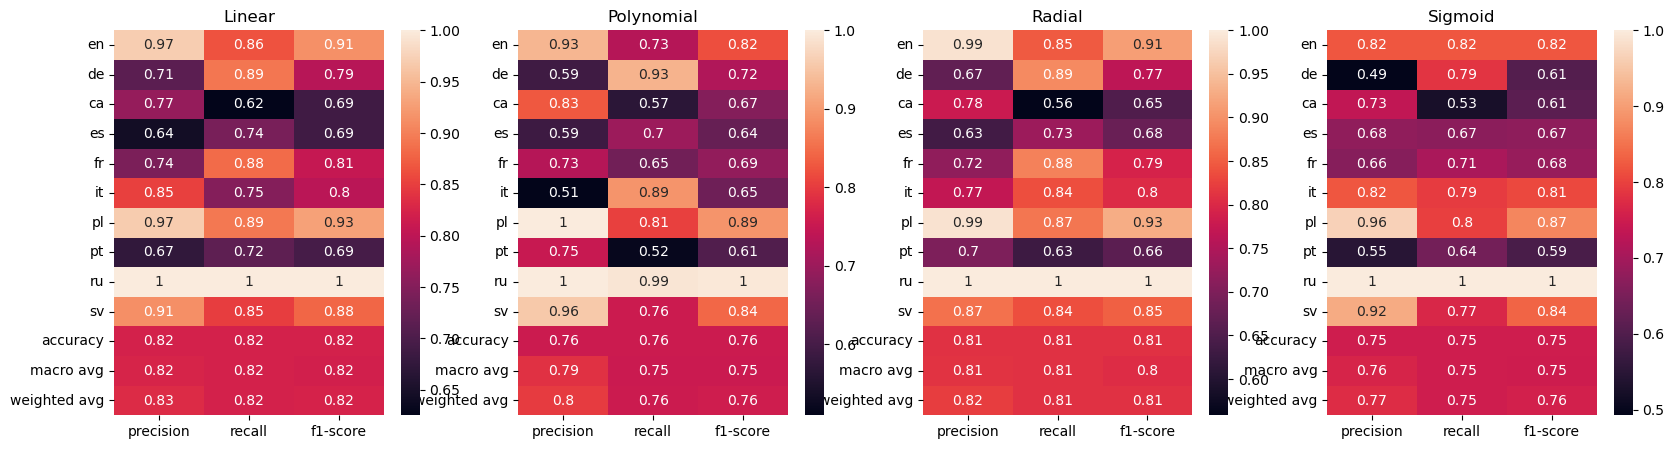

In [57]:
# Generate classification reports for the models
langs = ['en', 'de', 'ca', 'es', 'fr', 'it', 'pl', 'pt', 'ru','sv']
fig, ax = plt.subplots(1, len(models), figsize=(20, 5))
for i, key in enumerate(models):
    clf_report = classification_report(y_test, models[key].predict(X_test_pca), zero_division=0, target_names=langs, output_dict=True)
    sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True, ax=ax[i])
    ax[i].set_title(key)
plt.show()

Confusion Matrices

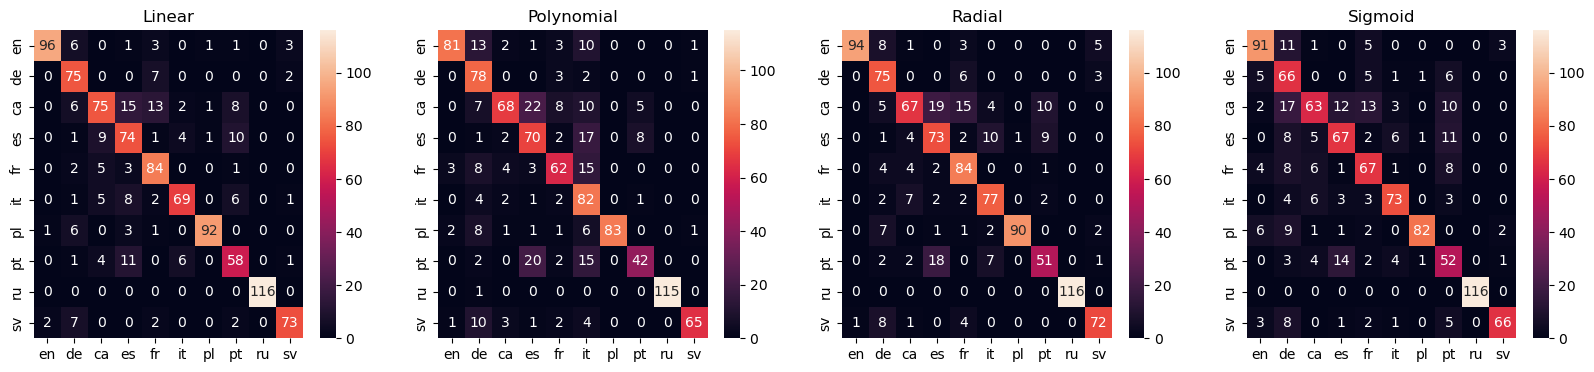

In [58]:
# Generate confusion matrices for the models and plot them as heatmaps try to make them look pretty,you can use seaborn for this
fig, ax = plt.subplots(1, len(models), figsize=(20, 4))
for i, key in enumerate(models):
    cm = confusion_matrix(y_test, models[key].predict(X_test_pca))
    sns.heatmap(cm, annot=True, ax=ax[i], fmt='d', xticklabels=langs, yticklabels=langs)
    ax[i].set_title(key)
plt.show()


### Grid Search
Lets try to find the best hiperparameters

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
# Let's preform a grid search on the model1 (SVM) to find the best parameters

parameters = {'C': [0.1, 1, 5, 10], 'gamma': ["scale", "auto", 1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'rbf'], "decision_function_shape": ["ovo", "ovr"]} # AÑADIR SIGMOID???

grid = GridSearchCV(svm.SVC(), parameters, refit=True, verbose=3)
grid.fit(X_train_pca, y_train)

print(grid.best_params_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear;, score=0.836 total time=   0.3s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear;, score=0.832 total time=   0.3s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear;, score=0.829 total time=   0.3s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear;, score=0.815 total time=   0.3s
[CV 5/5] END C=0.1, decision_function_shape=ovo, gamma=scale, kernel=linear;, score=0.817 total time=   0.3s
[CV 1/5] END C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.788 total time=   1.9s
[CV 2/5] END C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.772 total time=   1.9s
[CV 3/5] END C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf;, score=0.752 total time=   1.9s
[CV 4/5] END C=0.1, decision_function_shape=ovo, gamma=scale, kernel=rbf;, 

Create new Model with the best hyperparameters

Top 3 accuracy model: 97.77%
Accuracy:  84.51 Precision:  85.28 F1-score:  84.34


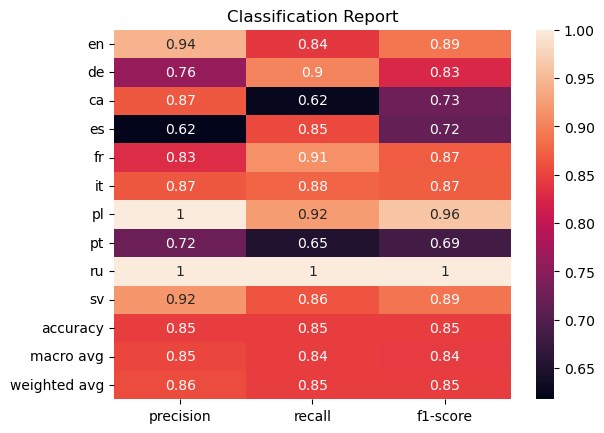

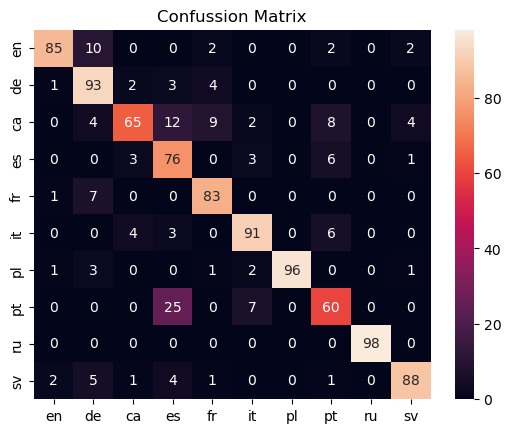

In [66]:
# Create and train model

# model = grid.best_estimator_
model = svm.SVC(C=10, kernel='rbf', gamma=0.001, decision_function_shape="ovo", probability=True)
model.fit(X_train_pca, y_train)

# Top 3
prediction = model.predict_proba(X_val_pca)
print(f'Top 3 accuracy model: {round(top_k_accuracy_score(y_val, prediction, k=3)*100,2)}%')

# Classification Report
clf_report = classification_report(y_val, model.predict(X_val_pca), zero_division=0, target_names=langs, output_dict=True)
sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True).set(title="Classification Report")
print("Accuracy: ", round(clf_report['accuracy']*100, 2), "Precision: ", round(clf_report['macro avg']['precision']*100,2), "F1-score: ", round(clf_report['macro avg']['f1-score']*100,2))
plt.show()

# Confussion Matrix
cm = confusion_matrix(y_val, model.predict(X_val_pca))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=langs, yticklabels=langs).set(title="Confussion Matrix")
plt.show()


In [124]:
import numpy as np
from py.process import *

In [125]:
def find_phrase_lang(phrase):
    df_phrase = pr.process_phrase(phrase)
    # print("Phrase: \n", ' '.join(list(df_phrase['word'])), "\n")
    X_phrase = df_phrase.drop(['word', 'lang'], axis=1)
    y_phrase = df_phrase['lang']

    X_test_phrase = scaler.transform(X_phrase)
    X_test_phrase_pca = pca.transform(X_test_phrase)

    prediction = model.predict_proba(X_test_phrase_pca)

    pred_langs = [0] * len(langs)
    for elem in prediction:
        pred_langs[np.argmax(elem)] += 1 / len(prediction)
        
    results = {key:round(val, 2) for key, val in zip(langs, pred_langs)}
    
    
    top_3 = sorted(results.items(), key=lambda x: x[1], reverse=True)[:3]
    for val in top_3:
        print(f'{val[0]}: {val[1]}')

In [126]:
# Separate features from target
#df_phrase = pd.read_csv('data/phrase/1.csv', index_col=0)
prob = find_phrase_lang('hello my name is jonathan and i like to walk')

NameError: name 'count_special_characters' is not defined